In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')#
%matplotlib inline #To place the content properly in the notebook

UsageError: unrecognized arguments: #To place the content properly in the notebook


In [3]:
confirmed_df = pd.read_csv('try_kar_case.csv')
deaths_df = pd.read_csv('try_kar_death.csv')
recoveries_df = pd.read_csv('try_kar_rec.csv')


In [4]:
confirmed_df.head()

,District,05/01/2020,05/02/2020,05/03/2020,05/04/2020,05/05/2020,05/06/2020,05/07/2020,05/08/2020,05/09/2020,...,05/21/2020,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020
0,Aland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Athni,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bagalkot,10,12,22,22,22,22,22,26,29,...,60,64,64,69,80,84,84,84,84,84
3,Bagevadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bangalore,90,100,110,110,115,130,150,155,155,...,322,325,337,342,350,355,362,365,370,371


In [5]:
deaths_df.head()

,District,05/01/2020,05/02/2020,05/03/2020,05/04/2020,05/05/2020,05/06/2020,05/07/2020,05/08/2020,05/09/2020,...,05/21/2020,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020
0,Aland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Athni,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bagalkot,10,12,22,22,22,22,22,26,29,...,60,64,64,69,80,84,84,84,84,84
3,Bagevadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bangalore,0,0,0,0,0,1,1,1,1,...,8,9,9,9,9,10,10,11,11,11


In [6]:
recoveries_df.head()

,District,05/01/2020,05/02/2020,05/03/2020,05/04/2020,05/05/2020,05/06/2020,05/07/2020,05/08/2020,05/09/2020,...,05/21/2020,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020
0,Aland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Athni,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bagalkot,10,12,22,22,22,22,22,26,29,...,60,64,64,69,80,84,84,84,84,84
3,Bagevadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bangalore,0,11,11,17,17,18,19,34,36,...,70,79,79,80,89,112,112,112,130,140


In [7]:
cols = confirmed_df.keys()

In [8]:
confirmed = confirmed_df.loc[4, cols[1]:cols[-1]]

In [9]:
deaths = deaths_df.loc[4, cols[1]:cols[-1]]


In [10]:
recoveries = recoveries_df.loc[4, cols[1]:cols[-1]]


In [11]:
dates = confirmed.keys()
world_cases= []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

india_cases = [] 


india_deaths = []


india_recoveries = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)


In [12]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)


# deaths
world_daily_death = daily_increase(total_deaths)


# recoveries
world_daily_recovery = daily_increase(total_recovered)

In [13]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)#-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis
total_deaths = np.array(total_deaths).reshape(-1, 1)#converts to a 1X1 matrix 
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [14]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [33]:
start = '05/01/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [34]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.70, shuffle=False) 

In [35]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=6, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
svm_confirmed.score(X_test_confirmed,y_test_confirmed)*100

MAE: 181.93827327075903
MSE: 35433.448853319074


c:\users\vsulg\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1122.3285928192379

In [36]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 06/01/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

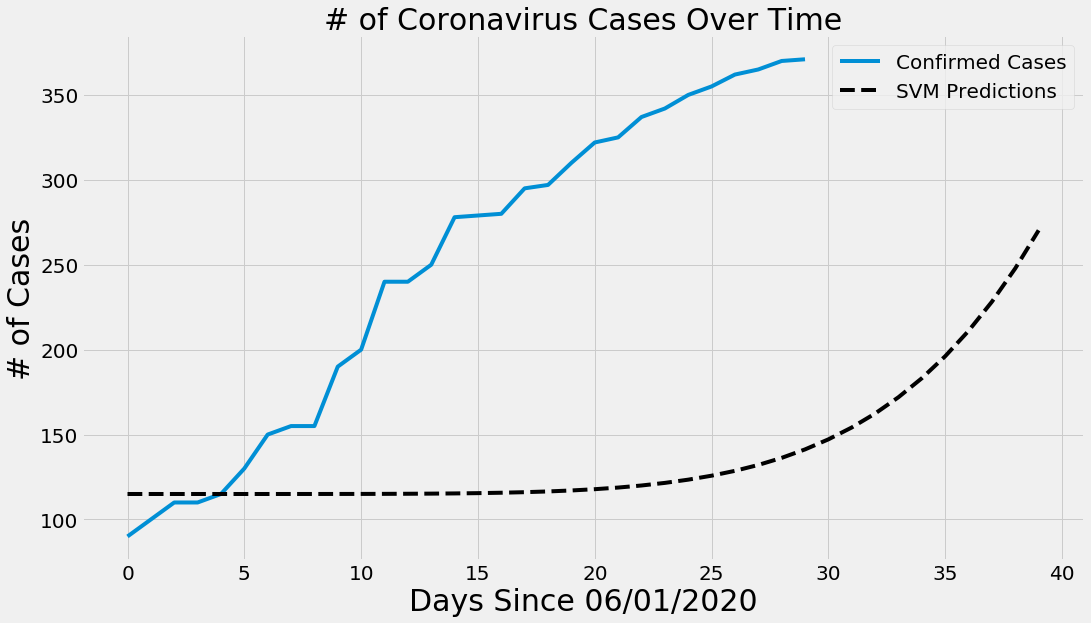

In [37]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'black')

In [38]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,05/31/2020,147.0
1,06/01/2020,154.0
2,06/02/2020,162.0
3,06/03/2020,172.0
4,06/04/2020,183.0
5,06/05/2020,196.0
6,06/06/2020,211.0
7,06/07/2020,228.0
8,06/08/2020,248.0
9,06/09/2020,270.0
